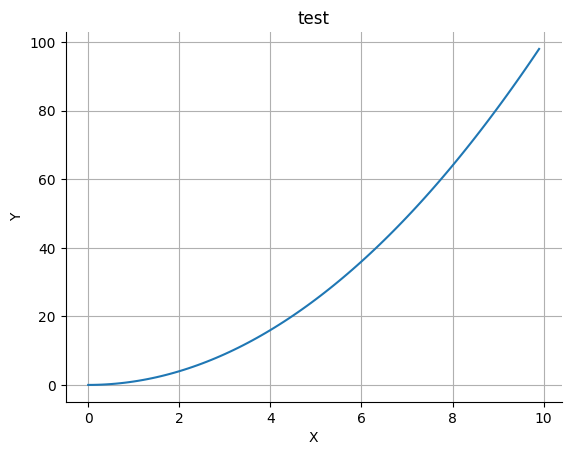

In [46]:
# Import des modules nécessaires et définition de fonctions pour tracer les courbes
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from IPython.display import display, Markdown

def plotIt(x,y, title="sortie", xlab="X", ylab="Y"):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')

    seaborn.despine(ax=ax, offset=0)

def plotScat(x,y, title="sortie", xlab="X", ylab="Y"):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')

    seaborn.despine(ax=ax, offset=0)

def plotIt2(x1,y1,x2,y2,title="sortie", xlab="X", ylab="Y", legends=""):
    fig, ax = plt.subplots()
    ax.plot(x1, y1, x2,y2)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')
    ax.legend(legends)

    seaborn.despine(ax=ax, offset=0)

def plotIt2s(x1,y1,x2,y2,title="sortie", xlab="X", ylab="Y", legends=""):
    fig, ax = plt.subplots()
    ax.plot(x1, y1,'rx')
    ax.plot(x2, y2)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')
    ax.legend(legends)

    seaborn.despine(ax=ax, offset=0)

a=np.arange(0,10,0.1)
b=a**2
plotIt(a,b, title="test")

Exercice : Linéarisation
=========================

On génère des données de base sur la base d'un modèle avec une caractéristique non linéaire.

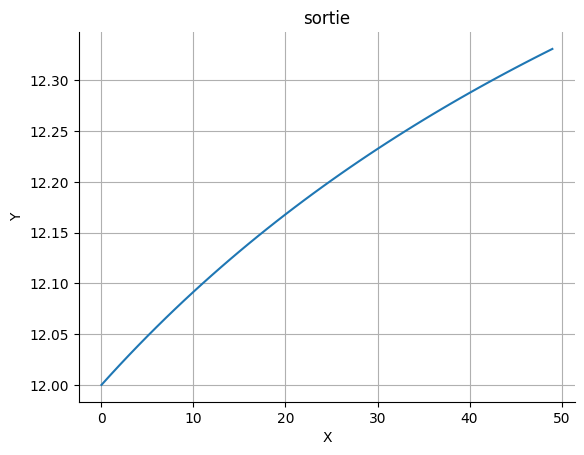

In [47]:
X=np.arange(0,50)
X0=12
X1=99
Y=X0+X/(X+X1)
plotIt(X,Y)

### Identification avec une droite

On utilise la fonction polyfit(X,Y,N) pour calculer les coefficient du polynôme. Utilisez le manuel de la fonction pour savoir comment utiliser les résultats.

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

- Calculez les coefficient
- Définissez une fonction pour évaluer les valeurs
- Calculer les points
- Tracer la fonction

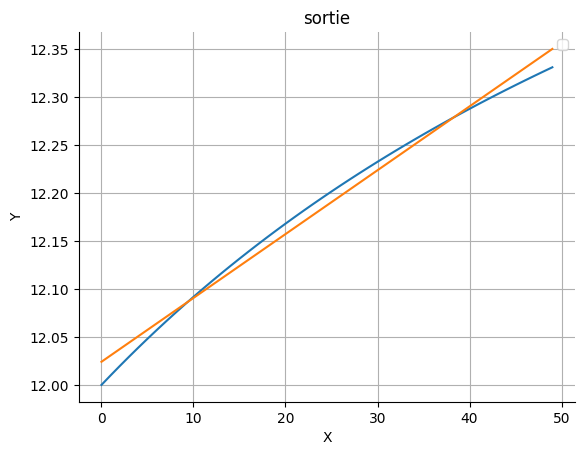

In [63]:
# Utilisez la fonction  poly=np.polyfit(X, Y, 1), puis calculez les points obtenus avec les coefficients retournés

# Solution 
poly = np.polyfit(X,Y,1)
poly
def getPoint(x,poly):
    return x*poly[0]+poly[1]

Ye=np.zeros(len(X))
for i in range(len(X)):
    Ye[i] = getPoint(X[i], poly)

plotIt2(X,Y,X,Ye)

In [64]:
poly

array([6.65509730e-03, 1.20241086e+01])

### Comparaison avec les données

Plotter un graphique avec la différence

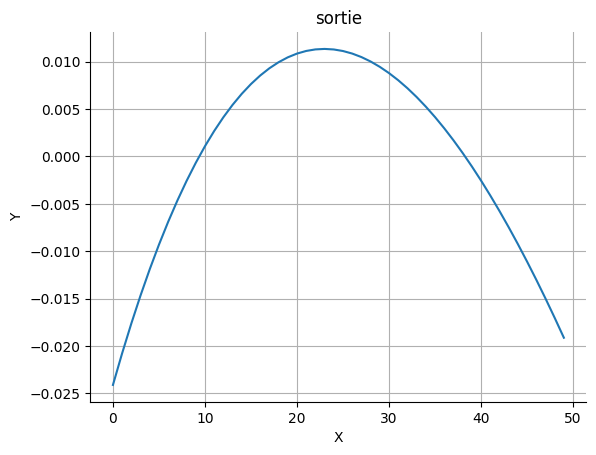

In [65]:
plotIt(X,Y-Ye)

## Identification avec une courbe quadratique

Recommencez l'identification avec une identification du 2e ordre

In [66]:
Y2e=np.zeros(len(X))

# Tapez votre code ici !
# Solution 
poly2 = np.polyfit(X,Y,2)
poly2
def getPoint2(x,poly2):
    return x*x*poly2[0]+poly2[1]*x+poly2[2]

for i in range(len(X)):
    Y2e[i] = getPoint2(X[i], poly2)

In [67]:
poly2

array([-5.44653051e-05,  9.32389725e-03,  1.20027582e+01])

In [68]:
Y2e

array([12.00275823, 12.01202766, 12.02118816, 12.03023973, 12.03918237,
       12.04801608, 12.05674086, 12.06535671, 12.07386363, 12.08226161,
       12.09055067, 12.09873079, 12.10680199, 12.11476425, 12.12261759,
       12.13036199, 12.13799746, 12.14552401, 12.15294162, 12.1602503 ,
       12.16745005, 12.17454087, 12.18152276, 12.18839572, 12.19515974,
       12.20181484, 12.20836101, 12.21479824, 12.22112655, 12.22734593,
       12.23345637, 12.23945788, 12.24535047, 12.25113412, 12.25680884,
       12.26237463, 12.26783149, 12.27317942, 12.27841842, 12.28354849,
       12.28856963, 12.29348184, 12.29828511, 12.30297946, 12.30756487,
       12.31204136, 12.31640891, 12.32066754, 12.32481723, 12.32885799])

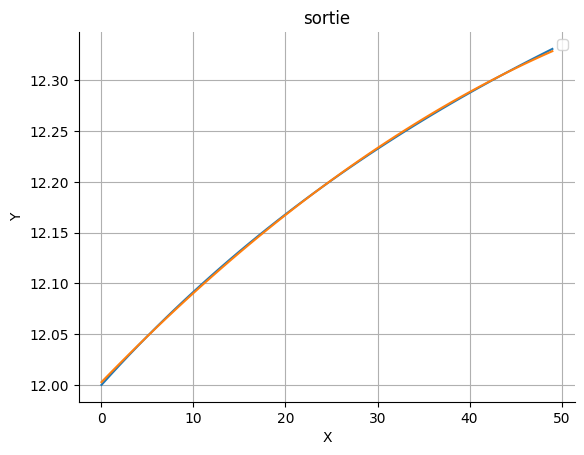

In [69]:
plotIt2(X,Y,X,Y2e)

Comparaison avec les données

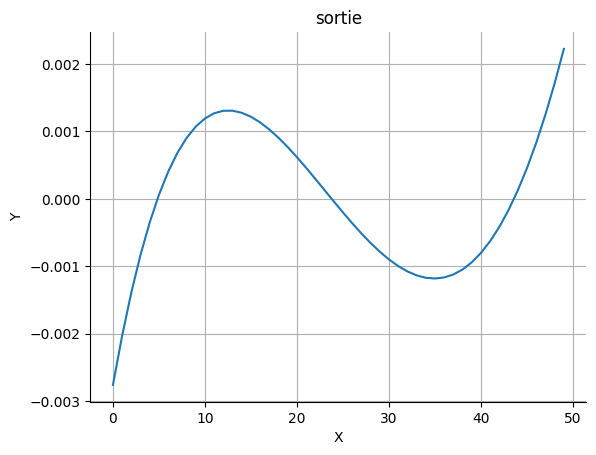

In [70]:
plotIt(X,Y-Y2e)

### Influence du bruit

On ajoute du bruit aux données mesurées

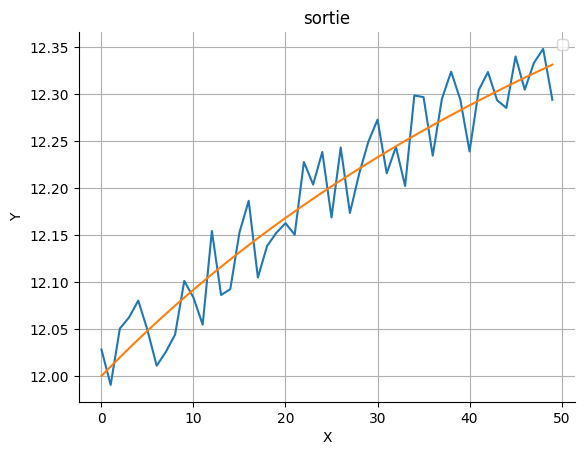

In [82]:
Yn=X0+X/(X+X1)+(np.random.rand(len(X))-0.5)*0.1
plotIt2(X,Yn,X,Y)

Refaire une identification pour évaluer l'influence du bruit sur l'identification. Tracer la courbe identifiée en la comparant à la courbe originale et à la courbe avec le bruit.

In [83]:
Y2ne=np.zeros(len(X))

# Tapez votre code ici !
# Solution 
poly2n = np.polyfit(X,Yn,2)
poly2n
def getPoint2(x,poly2):
    return x*x*poly2[0]+poly2[1]*x+poly2[2]

for i in range(len(X)):
    Y2ne[i] = getPoint2(X[i], poly2n)

In [84]:
poly2

array([-5.44653051e-05,  9.32389725e-03,  1.20027582e+01])

In [85]:
poly2n

array([-5.20321358e-05,  9.25043930e-03,  1.20037320e+01])

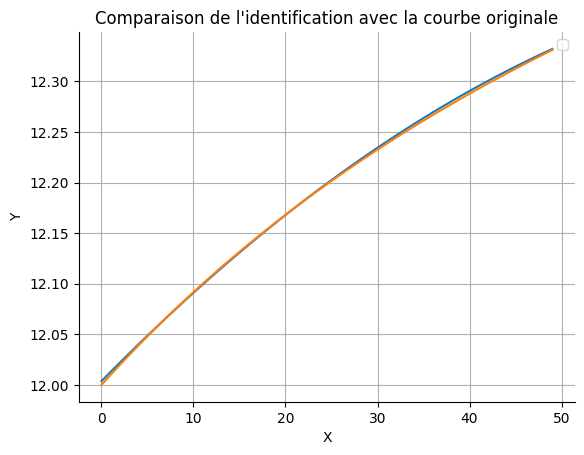

In [86]:
plotIt2(X,Y2ne,X,Y, title="Comparaison de l'identification avec la courbe originale")

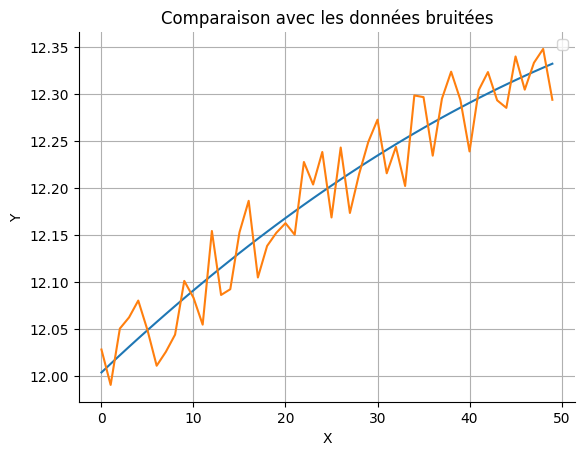

In [87]:
plotIt2(X,Y2ne, X, Yn, title="Comparaison avec les données bruitées")